## Index

[1. Import Libraries](#1.-Import-libraries)

[2. Get Training data](#2.-Get-Training-data)

[3. Pre-processing Data](#3.-Pre-processing-Data)

[4. Pre-trained model for Transfer Learning](#4.-Pre-trained-model-for-Transfer-Learning)

[5. Create custom model](#5.-Create-custom-model)

[6. Model training](#6.-Model-training)

[7. Test Data](#7.-Test-Data)

[8. Class Prediction](#8.-Class-Prediction)

[9. Model Validation](#9.-Model-Validation)

[10. Improvisations](#10.-Improvisations)

***

## 1. Import libraries

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import random
import os
import gc

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D

from tensorflow.keras.applications.vgg16 import VGG16

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

***

## 2. Get Training data

In [3]:
# Creating file path for our train data and test data
train_dir = "AutismDataset/train"
test_dir = "AutismDataset/test"


 - Collect 'Autistic' and 'Non-Autistic' images from train data, shuffle them and use as training images
 - The dataset has 2450 train images, with 1225 images for each 'Autistic' and 'Non-Autistic' category
 - 300 test images from file path

In [4]:
# Getting 'Autistic' and 'Non-Autistic' train images from respective file names of train data
train_non_autistic = []
train_autistic = []
for i in os.listdir(train_dir):
    if 'Non_Autistic' in ("AutismDataset/train/{}".format(i)):
        train_non_autistic.append(("AutismDataset/train/{}".format(i)))
    else:
        train_autistic.append(("AutismDataset/train/{}".format(i)))
        
# Getting test images from test data file path
#test_imgs = ["AutismDataset/test/{}".format(i) for i in os.listdir(test_dir)]
test_imgs = ["newTest/{}".format(i) for i in os.listdir(test_dir)]
print(train_non_autistic)
print(test_imgs)


# Concatenate 'Autistic'  and 'Non-Autistic' images and shuffle them as train_images
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

# Remove the lists to save space
del train_autistic
del train_non_autistic
gc.collect()

['AutismDataset/train/Non_Autistic.0.jpg', 'AutismDataset/train/Non_Autistic.1.jpg', 'AutismDataset/train/Non_Autistic.10.jpg', 'AutismDataset/train/Non_Autistic.100.jpg', 'AutismDataset/train/Non_Autistic.1000.jpg', 'AutismDataset/train/Non_Autistic.1001.jpg', 'AutismDataset/train/Non_Autistic.1002.jpg', 'AutismDataset/train/Non_Autistic.1003.jpg', 'AutismDataset/train/Non_Autistic.1004.jpg', 'AutismDataset/train/Non_Autistic.1005.jpg', 'AutismDataset/train/Non_Autistic.1006.jpg', 'AutismDataset/train/Non_Autistic.1007.jpg', 'AutismDataset/train/Non_Autistic.1008.jpg', 'AutismDataset/train/Non_Autistic.1009.jpg', 'AutismDataset/train/Non_Autistic.101.jpg', 'AutismDataset/train/Non_Autistic.1010.jpg', 'AutismDataset/train/Non_Autistic.1011.jpg', 'AutismDataset/train/Non_Autistic.1012.jpg', 'AutismDataset/train/Non_Autistic.1013.jpg', 'AutismDataset/train/Non_Autistic.1014.jpg', 'AutismDataset/train/Non_Autistic.1015.jpg', 'AutismDataset/train/Non_Autistic.1016.jpg', 'AutismDataset/trai

0

Let's see the training data samples

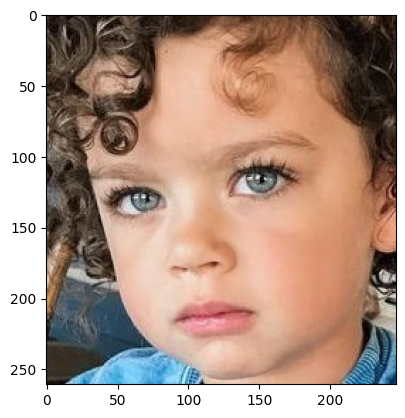

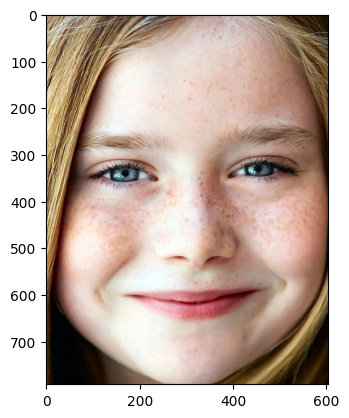

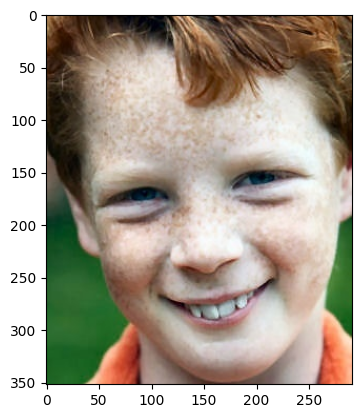

In [5]:
# Plot first 3 images from train_imgs
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

* These images need to be resized and formatted before they are provided to the model

## 3. Pre-processing Data

 - Defining the dimensions for resizing the images first
 - Then we write a function to read the images, resize them and specify the labels(y) for each image based on the file name - label '1' if 'Autistic' and label '0' if 'Non-Autistic'
 - X is the resized image and y is the class the image belongs to

In [6]:
import imageio
def read_and_process_image(list_of_images, nrows, ncolumns):
    X = []
    y = []
    for image in list_of_images:
        try:
            img = imageio.imread(image)
            if img is None:
                print("Error: Failed to load image:", image)
                continue
            resized_img = cv2.resize(img, (nrows, ncolumns), interpolation=cv2.INTER_CUBIC)
            X.append(resized_img)
            if 'Non_Autistic' in image:
                y.append(0)
            else:
                y.append(1)
        except Exception as e:
            print("Error processing image:", image, e)
    return X, y

Call the function to read and resize train images, it returns X_train - train images and y_train - train labels

In [7]:
# Get resized images and labels from train data
X_train, y_train = read_and_process_image(train_imgs,150,150)

# Delete train images to save space
del train_imgs
gc.collect()

C:\Users\agney\AppData\Local\Temp\ipykernel_18520\4210370229.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image)


6472

Convert the resized images and labels into numpy array

In [8]:
# Convert the lists to array
plt.figure(figsize=(12, 8))
X_train = np.array(X_train)
y_train = np.array(y_train)

<Figure size 1200x800 with 0 Axes>

In [9]:
# Shape of train images and labels
print("Shape of train images:", X_train.shape)
print("Shape of train labels:", y_train.shape)

Shape of train images: (2540, 150, 150, 3)
Shape of train labels: (2540,)


Get and pre-process validation data
- 100 images in the dataset named valid, these are entirely new - 50 images in each class
- Using validation images to evaluate our model performance
- Get the validation images from the file path, shuffle them as val_imgs

In [10]:
# Repeat the above process for validation data to get val_images
val_autistic = "AutismDataset/valid/Autistic"
val_non_autistic = "AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

# Remove the lists to save space
del val_autistic_imgs
del val_non_autistic_imgs
gc.collect()

158

 - Read, resize and label the validation images
 - X_val - validation images, y_val - validation labels

In [11]:
# Get resized images and labels from validation data
X_val, y_val = read_and_process_image(val_imgs,150,150)

# Delete validation images to save space
del val_imgs
gc.collect()

C:\Users\agney\AppData\Local\Temp\ipykernel_18520\4210370229.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image)


0

Convert the resized images and labels into numpy array

In [12]:
# Convert the lists to array
plt.figure(figsize=(12, 8))
X_val = np.array(X_val)
y_val = np.array(y_val)

<Figure size 1200x800 with 0 Axes>

In [13]:
# Shape of validation images and labels
print("Shape of validation images:", X_val.shape)
print("Shape of validation labels:", y_val.shape)

Shape of validation images: (100, 150, 150, 3)
Shape of validation labels: (100,)


In [14]:
# Get length of train data and validation data
ntrain = len(X_train)
nval = len(X_val)
batch_size = 32

***

## 4. Pre-trained model for Transfer Learning

We use pre-trained Convolutional Neural Network(CNN) model VGG16 that has been trained on a large number of image data for image classification task (IMAGENET)

In [15]:
# Calling pre-trained VGG16 model
base_model = VGG16(include_top=False,weights='imagenet',input_shape=(150,150,3))


In [16]:
# Freeze the layers in pre-trained model, we don't need to train again
for layer in base_model.layers:
   layer.trainable = False

In [17]:
# Let's see how many layers are in the vgg model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  19


***

## 5. Create custom model

Connecting the pre-trained CNN model to our custom fully connnected layer

Added a Dropout layer to stop neuron overpowering

In [18]:
# Create our classifier model, connect pre-trained model vgg to our model
model = keras.models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [19]:
# Create our classifier model, connect pre-trained model vgg to our model
# model = keras.models.Sequential()
# model.add(base_model)
# model.add(layers.Flatten())
# model.add(layers.Dense(300, activation = 'relu'))
# model.add(layers.Dense(300, activation = 'relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1, activation = 'softmax'))

In [20]:
# Create summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 18,910,017
Trainable params: 4,195,329
Non-trainable params: 14,714,688
_________________________________________________________________


 - Specify the loss function, optimizer and metrics for the model
 - 'binary-crossentropy' for loss since we are dealing with binary classification
 - Hyperparameter tuning is performed by choosing between optimizers and specifying learning rate to reduce loss

In [21]:
# Compile the model specifying optimizer, loss function and metrics
model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.Adam(), metrics = ['acc'])

 - Image data generator performs scaling of image pixel array between 0 and 1, also image transformation like zoom, flip are performed on the available train images to increase the training data for the model, so that model won't overfit by training on small dataset
 - Performing scaling on validation images but don't augument images in validation dataset
 - Validation images are used to test the performance of our model

In [22]:
# Configure data augumentation and scaling of images to prevent overfitting since we have a small train data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

# Only rescaling for validation data
val_datagen = ImageDataGenerator(rescale = 1./255)

Image generator creates batches of train and validation data

In [23]:
# Create test and validation image generator
train_generator = train_datagen.flow(X_train, y_train, batch_size = batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size = batch_size)

***

## 6. Model training

 - Fit and train the model on the training data and measure the performance on unseen validation data
 - Specify number of epochs the model has to be trained on training data
 - Accuracy gradually increases as epochs increase
    - High accuracy found at ~50 epochs (training takes a very long time)

In [24]:
# Train the model
history = model.fit(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=3,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size
                             )

Epoch 1/3
79/79 [==============================] - 135s 2s/step - loss: 0.8033 - acc: 0.6515 - val_loss: 0.5584 - val_acc: 0.7292
Epoch 2/3
79/79 [==============================] - 138s 2s/step - loss: 0.5617 - acc: 0.7133 - val_loss: 0.5326 - val_acc: 0.7188
Epoch 3/3
79/79 [==============================] - 144s 2s/step - loss: 0.5343 - acc: 0.7356 - val_loss: 0.5262 - val_acc: 0.7500


In [25]:
# Learning curves for training and validation
history_df = pd.DataFrame(history.history)
history_df

,loss,acc,val_loss,val_acc
0,0.803329,0.651515,0.558407,0.729167
1,0.561691,0.713317,0.532565,0.718750
2,0.534297,0.735646,0.526200,0.750000


Text(0.5, 1.0, 'Training and Validation Accuracy')

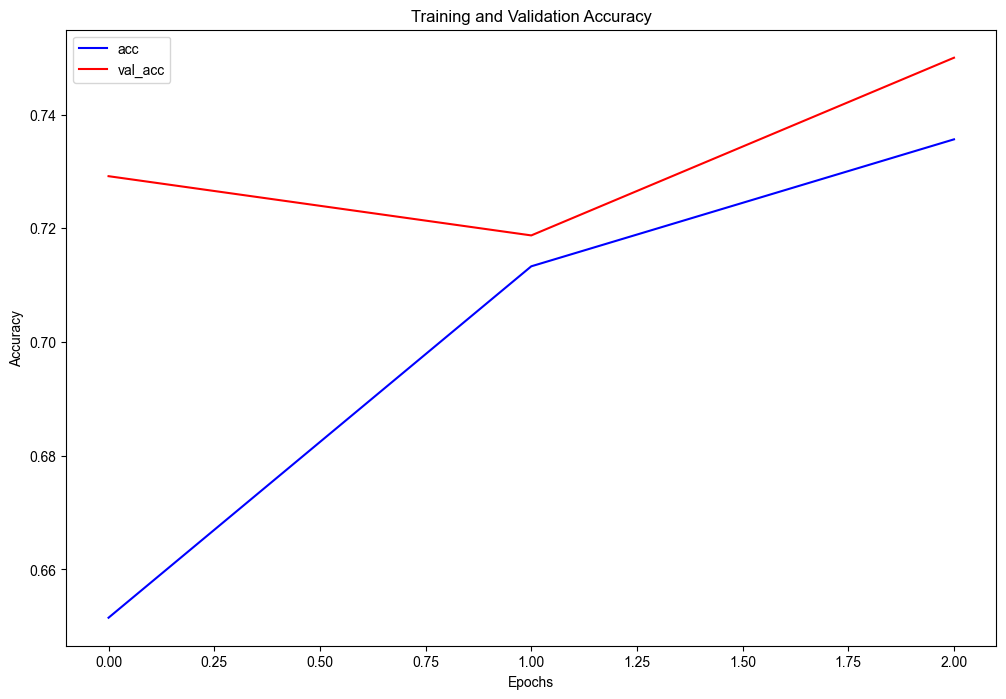

In [26]:
# Plot train and validation accuracy
plt.figure(figsize=(12, 8))
sns.lineplot(data=history_df.loc[:, ["acc", "val_acc"]], palette=['b', 'r'], dashes=False)
sns.set_style("whitegrid")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

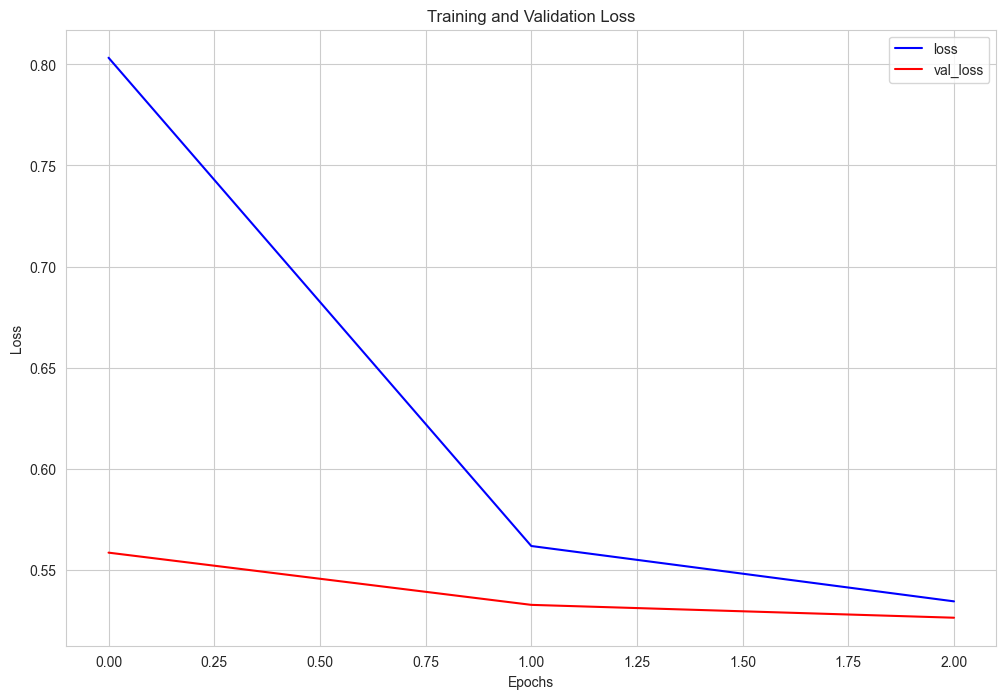

In [27]:
# Plot train and validation loss
plt.figure(figsize=(12, 8))
sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]], palette=['b', 'r'], dashes=False)
sns.set_style("whitegrid")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")

- The learning curve of training loss shows a good trend and the loss minimises as the number of epochs increase
- The learning curve of validation loss shows noise around the training loss and the validation loss tends to increase after 15-17 epochs
- The validation accuracy fluctuates a lot too
- This may be because the model has very small data for validation compared to training

***

## 7. Test Data

Read and resize the test images, convert them into numpy array

In [6]:
nrows = 150
ncolumns  = 150
channels = 3

train_non_autistic = []
train_autistic = []
for i in os.listdir(train_dir):
    if 'Non_Autistic' in ("AutismDataset/train/{}".format(i)):
        train_non_autistic.append(("AutismDataset/train/{}".format(i)))
    else:
        train_autistic.append(("AutismDataset/train/{}".format(i)))
        
# Getting test images from test data file path
test_imgs = ["AutismDataset/test/{}".format(i) for i in os.listdir(test_dir)]
# test_imgs = ["AutismDataset/customTest/{}".format(i) for i in os.listdir(test_dir)]

print(train_non_autistic)
print(test_imgs)


# Concatenate 'Autistic'  and 'Non-Autistic' images and shuffle them as train_images
train_imgs = train_autistic + train_non_autistic


#from sklearn.model_selection import train_test_split
# Read and resize test images
random.shuffle(test_imgs)

X_test, y_test = read_and_process_image(test_imgs,nrows,ncolumns)
print(X_test)
#X_test,y_test = train_test_split(test_imgs)
X = np.array(X_test)
#test_datagen = ImageDataGenerator(rescale = 1./255)


NameError: name 'train_dir' is not defined

***

## 8. Class Prediction

In [38]:


output = np.round(model.predict(X_train[1:30]), 3)
print(output)


1/1 [==============================] - 1s 1s/step
[[0.986]
 [1.   ]
 [0.982]
 [0.   ]
 [1.   ]
 [1.   ]
 [0.467]
 [0.879]
 [0.   ]
 [1.   ]
 [0.084]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.871]
 [1.   ]
 [0.911]
 [0.115]
 [0.602]
 [0.005]
 [0.505]
 [1.   ]
 [1.   ]
 [0.078]
 [0.995]
 [0.   ]
 [0.017]
 [1.   ]]


In [39]:
# Predict label for test images
pred = model.predict(X)
threshold = 0.5
predictions = np.where(pred > threshold, 1,0)
print(predictions)

10/10 [==============================] - 11s 1s/step
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [

In [40]:
#Plot test images and their corresponding predictions
test = pd.DataFrame(data = predictions, columns = ["predictions"])
test
test["filename"] = [os.path.basename(i) for i in test_imgs]
test["test_labels"] = y_test
test = test[["filename", "test_labels", "predictions"]]
test

,filename,test_labels,predictions
0,Non_Autistic.13.jpg,0,1
1,Autistic.120.jpg,1,1
2,Non_Autistic.120.jpg,0,1
3,Autistic.49.jpg,1,1
4,Autistic.139.jpg,1,1
...,...,...,...
295,Autistic.80.jpg,1,1
296,Non_Autistic.127.jpg,0,1
297,Non_Autistic.66.jpg,0,1
298,Autistic.60.jpg,1,1


In [41]:
model_accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy: {:.2f}%".format(model_accuracy * 100))

Model Accuracy: 65.67%


## 9. Model Validation

- We can evaluate the performance of the model on the test datset (since we konw the labels of the test data for this problem)
- We compare the metrics to select the best model
- For a well balanced dataset in both classes like in this dataset, Area Under the Curve of ROC can be used as evaluation metric to make comparison between models

- Classification report gives a summary of different metrics based on the predictive power of the model among positive and negative class
- If we are dealing with an unbalanced dataset (under most of real world circumstances), the accuracy alone is not a good metric for comparison
- Since models will be biased in predicitons for an unbalanced dataset, we rely on Precision, Recall metrics which take into account of Type 1 (False Positive FP) and Type 2 (False Negative FN) errors too

In [42]:
# Generating Classification report for model's performance in each class
cl_report = classification_report(y_test, predictions)
print(cl_report)

              precision    recall  f1-score   support

           0       0.81      0.41      0.55       150
           1       0.61      0.90      0.72       150

    accuracy                           0.66       300
   macro avg       0.71      0.66      0.64       300
weighted avg       0.71      0.66      0.64       300



Confusion Matrix gives the summary of True Positive(TP), True Negative(TN), False Positive(FP) and False Negative(FN) predictions

In [43]:
# Generating Confusion Matrix for the predictions against true labels
cn_matrix = confusion_matrix(y_test, predictions)
cn_matrix

array([[ 62,  88],
       [ 15, 135]], dtype=int64)

NameError: name 'cn_matrix' is not defined

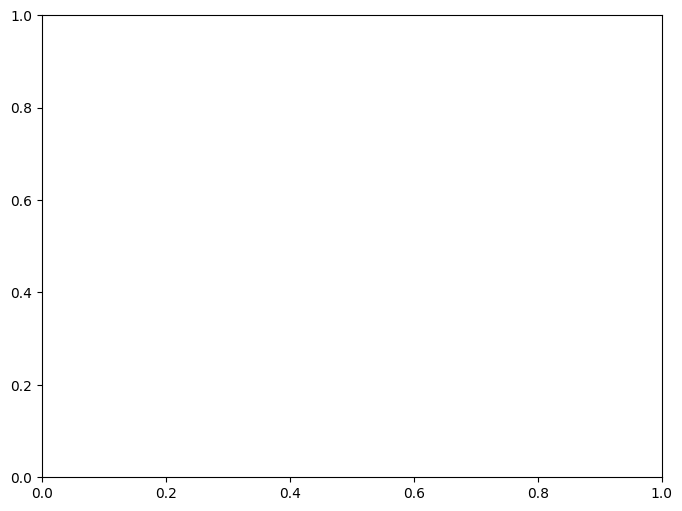

In [5]:
# Plotting the True Positives, True Negatives, False Positives and False Negatives from model's predictions
f, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(cn_matrix, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

- The Receiver Operating Characteristic ROC curve shows the performance measure of the model in diagnosing both the classes
- Higher the Area under the Curve AUC, better the performance of the model


In [3]:
# Let's plot the AUC-ROC curve to assess the performance of our model
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc= auc(fpr, tpr)

NameError: name 'y_test' is not defined

In [4]:
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([1,0], [1,0], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic curve")
plt.legend(loc = 'lower right')

NameError: name 'fpr' is not defined

<Figure size 1000x800 with 0 Axes>

***

Let's see how the model has predcited on a set of sample test images!

In [ ]:
# Let's check our predcitions against some test images
plt.figure(figsize=(4,4))
for val, i in enumerate(test_imgs[:3]):
    try:
        img = imageio.imread(i)
        imgplot = plt.imshow(img)
        plt.title(os.path.basename(i) + ' - Prediction: ' +  f"{'Autistic' if predictions[val] == 1 else 'Non-Autistic'}")
        plt.show()
    except:
        val += 1


Our model has performed reasonably well for a small training data, we could still improvise the model for greater accuracy

***

## 10. Improvisations

- Providing the model with a large dataset for training can help the model to generalise on new data 
- Instead of using the small validation dataset (100 images), we can perform Cross Validation on the entire data to prevent overfitting
- We can perform fine tuning by training some of the top layers of pre-trained VGG16 model to customise the feature extraction